In [40]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import itertools
from matplotlib import cm as CM
from matplotlib.colors import LogNorm
cmap = CM.get_cmap("jet").copy()

cmap.set_bad('w') 

def get_h5keys(k0,dat):
    kk = k0
    try:       
        for k in dat.keys():
            kk = k0+'/'+k
            print(kk)
            get_h5keys(kk,dat[k])
    except Exception as e:
        pass

def plot2d(mat,bxax,byax,title,xlabel,ylabel,ast,figsz = None):
    if figsz!=None:
        fig = plt.figure(figsize=figsz)
    else:
        fig = plt.gcf()

    im=plt.imshow(np.rot90(mat),interpolation="nearest", cmap=cmap,
                  norm=LogNorm(vmin=1, vmax=mat.max()),
                  extent = [bxax.min(),bxax.max(),byax.min(),byax.max()],
                  aspect=ast*(bxax.min()-bxax.max())/(byax.min()-byax.max()))

    plt.colorbar(im,fraction=0.046, pad=0.04)   

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Read HDF5 file

In [41]:
h5f = '/reg/d/psdm/tmo/tmox47119/scratch/preproc/tmolw0618_run_80.h5'
datf = h5py.File(h5f,'r')

## Content in HDF5 file

In [42]:
get_h5keys('',datf)

/ebm_l3
/ele_hits
/ele_nhts
/evt
/gmd
/index
/mcp
/nhts
/npks_mcp
/npks_x1
/npks_x2
/npks_y1
/npks_y2
/pho
/t
/timestamp
/x
/x1
/x2
/xgmd
/y
/y1
/y2


## Read preprocessed data

In [43]:
ts = datf['t'][:]
ts_ind = ~np.isnan(ts)
ts = ts[ts_ind]
xs = datf['x'][:][ts_ind]
ys = datf['y'][:][ts_ind]


In [44]:
ts.shape

(51124,)

## Count rate

<IPython.core.display.Javascript object>


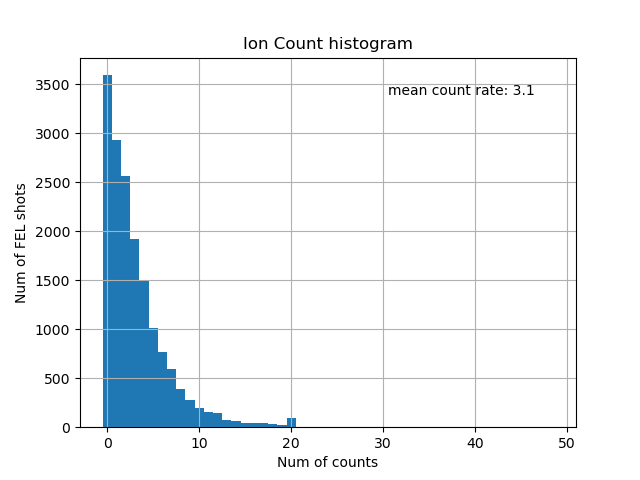

Text(0, 0.5, 'Num of FEL shots')

In [45]:
num_hits = ts_ind.sum(1)
numhits_bins = np.arange(50)-0.5
plt.figure()
plt.hist(num_hits,numhits_bins)
plt.grid('on')
plt.text(s = 'mean count rate: '+str(round(np.mean(num_hits),1)),x=0.6*plt.xlim()[1],y=0.9*plt.ylim()[1])
plt.title('Ion Count histogram')
plt.xlabel('Num of counts')
plt.ylabel('Num of FEL shots')

## X-Y-T

In [46]:
tbins = np.arange(0,10000,3)
xbins = np.arange(-60,60,1)
th1 = (tbins[1:]+tbins[:-1])/2
xh1 = (xbins[1:]+xbins[:-1])/2

<IPython.core.display.Javascript object>


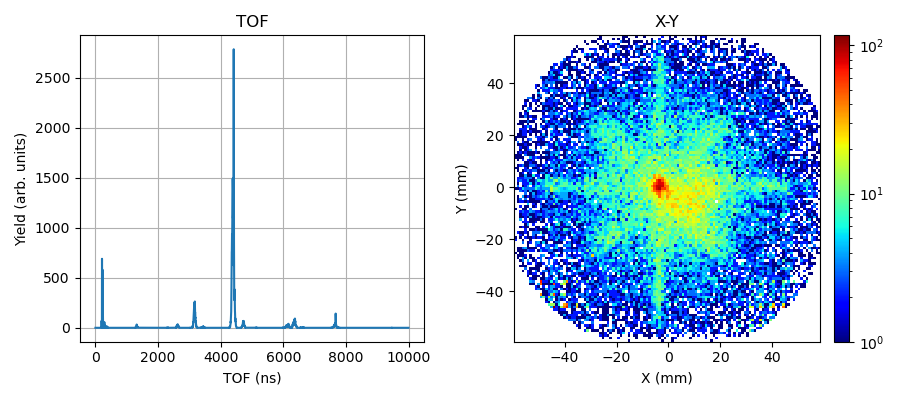

In [47]:

th2, _ = np.histogram(ts,tbins)
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(th1,th2)
plt.grid('on')
plt.title('TOF')
plt.xlabel('TOF (ns)')
plt.ylabel('Yield (arb. units)')

xy,_,_= np.histogram2d(xs,ys,bins=[xbins,xbins])
plt.subplot(122)
plot2d(xy,xh1,xh1,title='X-Y',xlabel='X (mm)',ylabel='Y (mm)',ast=1)

plt.tight_layout()

<IPython.core.display.Javascript object>


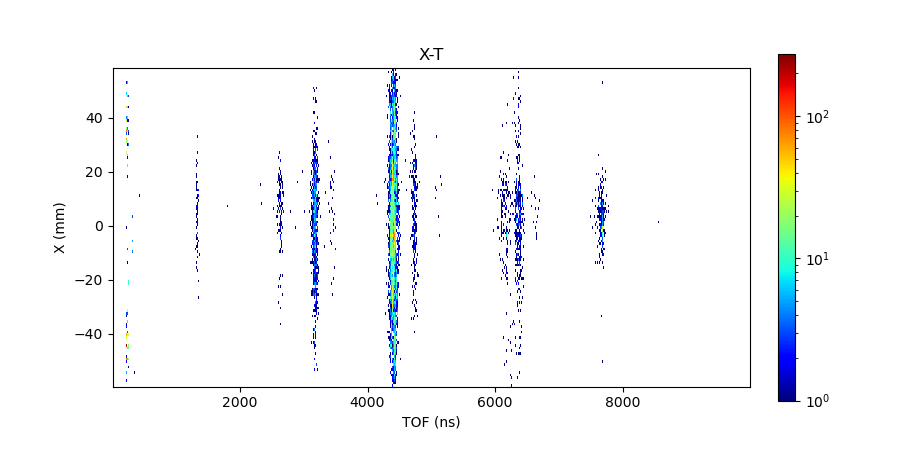

In [48]:
xt,_,_= np.histogram2d(ts,xs,bins=[tbins,xbins])
plot2d(xt,th1,xh1,title='X-T',xlabel='TOF (ns)',ylabel='X (mm)',ast=0.5,figsz = (9,4.5))

<IPython.core.display.Javascript object>


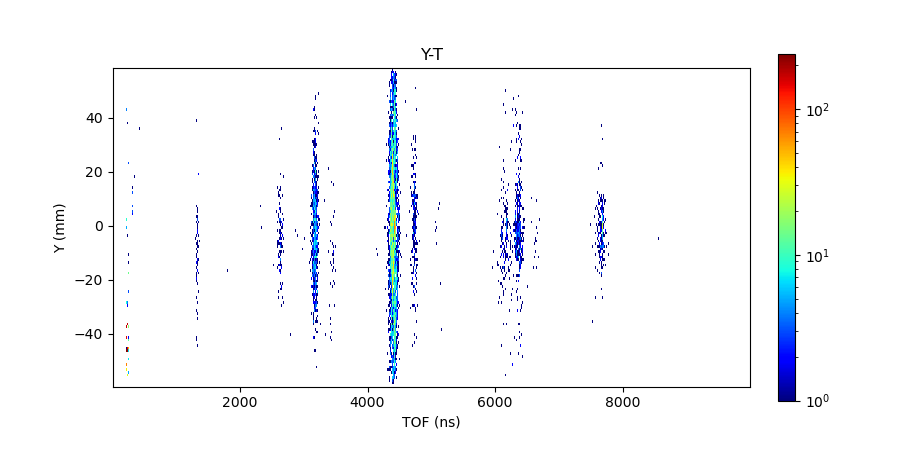

In [49]:
yt,_,_= np.histogram2d(ts,ys,bins=[tbins,xbins])
plot2d(yt,th1,xh1,title='Y-T',xlabel='TOF (ns)',ylabel='Y (mm)',ast=0.5,figsz = (9,4.5))